In [1]:
# function ClickConnect(){
# console.log("Working"); 
# document.querySelector("colab-toolbar-button#connect").click() 
# }
# setInterval(ClickConnect,60000)
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import numpy as np
import cv2
from zipfile import ZipFile
size=64

In [3]:
zf = ZipFile('/content/drive/My Drive/images.zip')
uncompress_size = sum((file.file_size for file in zf.infolist()))
print('uncompressed_size',uncompress_size/1e6)

extracted_size = 0
for file in zf.infolist():
    extracted_size += file.file_size
    print ("%s %%" % (extracted_size * 100/uncompress_size))
    try:
      zf.extract(file)
    except:
      continue

Streaming output truncated to the last 5000 lines.
92.15132377608901 %
92.15215543937364 %
92.1539071289031 %
92.1562690014065 %
92.15750871149598 %
92.15918059801636 %
92.16133972773996 %
92.16299927984255 %
92.16367187631853 %
92.16465829273562 %
92.16664548202328 %
92.16859917291946 %
92.17023486500075 %
92.17108385039123 %
92.17370528487771 %
92.17668718092884 %
92.17888270729509 %
92.1796653699145 %
92.18154727854322 %
92.18358212047228 %
92.1849038578101 %
92.18560415617522 %
92.1867962136233 %
92.18770646669557 %
92.1888205409667 %
92.1903418532284 %
92.19200774104286 %
92.19387974169663 %
92.19542626200344 %
92.19667978933688 %
92.1993267688744 %
92.20017595646846 %
92.201613893458 %
92.20414642577474 %
92.20527431728983 %
92.20718156876605 %
92.20889841188021 %
92.209718077753 %
92.21187936431468 %
92.21437961146137 %
92.21601570794981 %
92.2170857692438 %
92.21950473055523 %
92.22040473864661 %
92.22262506865081 %
92.2239619712564 %
92.22681789448323 %
92.22756766532189 %
92.

In [4]:
def load_img(f):
    f=open(f)
    lines=f.readlines()
    
    imgs,lab=[], []
    
    for i in range(len(lines)):
        fn,label = lines[i].split(' ')
        im1 = cv2.imread('/content/'+fn, cv2.IMREAD_GRAYSCALE)
        im1 = cv2.resize(im1,(size,size))
        print (i,'/content/'+fn)
        imgs.append(im1)
        lab.append(int(label))
        
    return imgs, lab
  
train_x,train_y=load_img('/content/train.txt')
val_x,val_y=load_img('/content/val.txt')
test_x,test_y=load_img('/content/test.txt')
print ('have %d train imgs and %d val imgs and %d test imgs.' % (len(train_x),len(val_x),len(test_x)))

Streaming output truncated to the last 5000 lines.
59227 /content/images/n02167151/n02167151_779.JPEG
59228 /content/images/n02167151/n02167151_7800.JPEG
59229 /content/images/n02167151/n02167151_7827.JPEG
59230 /content/images/n02167151/n02167151_7876.JPEG
59231 /content/images/n02167151/n02167151_7882.JPEG
59232 /content/images/n02167151/n02167151_7903.JPEG
59233 /content/images/n02167151/n02167151_7905.JPEG
59234 /content/images/n02167151/n02167151_7924.JPEG
59235 /content/images/n02167151/n02167151_7948.JPEG
59236 /content/images/n02167151/n02167151_7949.JPEG
59237 /content/images/n02167151/n02167151_7956.JPEG
59238 /content/images/n02167151/n02167151_7963.JPEG
59239 /content/images/n02167151/n02167151_7964.JPEG
59240 /content/images/n02167151/n02167151_7967.JPEG
59241 /content/images/n02167151/n02167151_7975.JPEG
59242 /content/images/n02167151/n02167151_7976.JPEG
59243 /content/images/n02167151/n02167151_7978.JPEG
59244 /content/images/n02167151/n02167151_7979.JPEG
59245 /content

In [5]:
train_x = np.array(train_x)
train_y = np.array(train_y)

val_x = np.array(val_x)
val_y = np.array(val_y)

test_x = np.array(test_x)
test_y = np.array(test_y)

In [6]:
train_samples, hx, wy = train_x.shape
train_dataset = train_x.reshape((train_samples,hx*wy))

val_samples, val_hx, val_wy = val_x.shape
val_dataset = val_x.reshape((val_samples,val_hx*val_wy))

test_samples, test_hx, test_wy = test_x.shape
test_dataset = test_x.reshape((test_samples,test_hx*test_wy))

In [7]:
print (train_dataset.shape)

(63325, 4096)


In [8]:
from sklearn.decomposition import PCA
n_components = 50
print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, train_dataset.shape[0]))

pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(train_dataset)
print("PCA fit done")

eigenfaces = pca.components_.reshape((n_components, size, size))

print("Projecting the input data on the eigenfaces orthonormal basis")

#進行降維
train_pca = pca.transform(train_dataset)
val_pca = pca.transform(val_dataset)
test_pca = pca.transform(test_dataset)
print("done")

Extracting the top 50 eigenfaces from 63325 faces
PCA fit done
Projecting the input data on the eigenfaces orthonormal basis
done


In [9]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear',C=0.8)
svclassifier.fit(train_pca, train_y)

SVC(C=0.8, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [10]:
valy_pred = svclassifier.predict(val_pca)
target_names = ['0', '1', '2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23',
                '24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42','43','44','45','46','47','48','49']
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(val_y, valy_pred, target_names=target_names))
print(confusion_matrix(val_y, valy_pred, labels=range(50)))
print (val_y)
print (valy_pred)

              precision    recall  f1-score   support

           0       0.10      0.22      0.13         9
           1       0.14      0.22      0.17         9
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         9
           4       0.25      0.11      0.15         9
           5       0.00      0.00      0.00         9
           6       0.33      0.22      0.27         9
           7       0.09      0.11      0.10         9
           8       0.00      0.00      0.00         9
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00         9
          11       0.00      0.00      0.00         9
          12       0.50      0.11      0.18         9
          13       0.00      0.00      0.00         9
          14       0.05      0.11      0.07         9
          15       0.00      0.00      0.00         9
          16       0.07      0.11      0.08         9
          17       0.00    

In [11]:
y_pred = svclassifier.predict(test_pca)
target_names = ['0', '1', '2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23',
                '24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42','43','44','45','46','47','48','49']
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_y, y_pred, target_names=target_names))
print(confusion_matrix(test_y, y_pred, labels=range(50)))
print (test_y)
print (y_pred)

              precision    recall  f1-score   support

           0       0.19      0.33      0.24         9
           1       0.00      0.00      0.00         9
           2       0.13      0.22      0.17         9
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00         9
           7       0.00      0.00      0.00         9
           8       0.14      0.11      0.12         9
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00         9
          11       0.00      0.00      0.00         9
          12       0.50      0.11      0.18         9
          13       0.00      0.00      0.00         9
          14       0.06      0.11      0.08         9
          15       0.00      0.00      0.00         9
          16       0.12      0.11      0.12         9
          17       0.50    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    畫出data在某模型上的learning curve.
    參數解釋
    ----------
    estimator : 你用的分類器。
    title : 表格的標題。
    X : 輸入的feature，numpy類型
    y : 輸入的target vector
    ylim : tuple格式的(ymin, ymax), 設定圖像中縱座標的最低點和最高點
    cv : 做cross-validation的時候，數據分成的份數，其中一份作爲cv集，其餘n-1份作爲training(默認爲3份)
    n_jobs : 並行的的任務數(默認1)
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.draw()
    plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


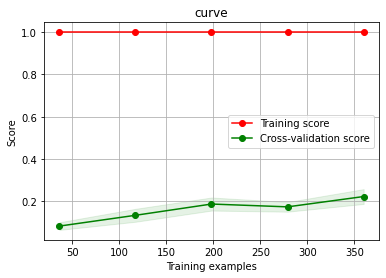

In [13]:
plot_learning_curve(svclassifier, "curve",test_pca,y_pred)

In [16]:
print (450*0.09)

40.5
